# Generator Architecture

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Lambda, Input, concatenate
from tensorflow.keras.models import Model
from layers import Generator

In [2]:
generator = Generator()

## Generator model

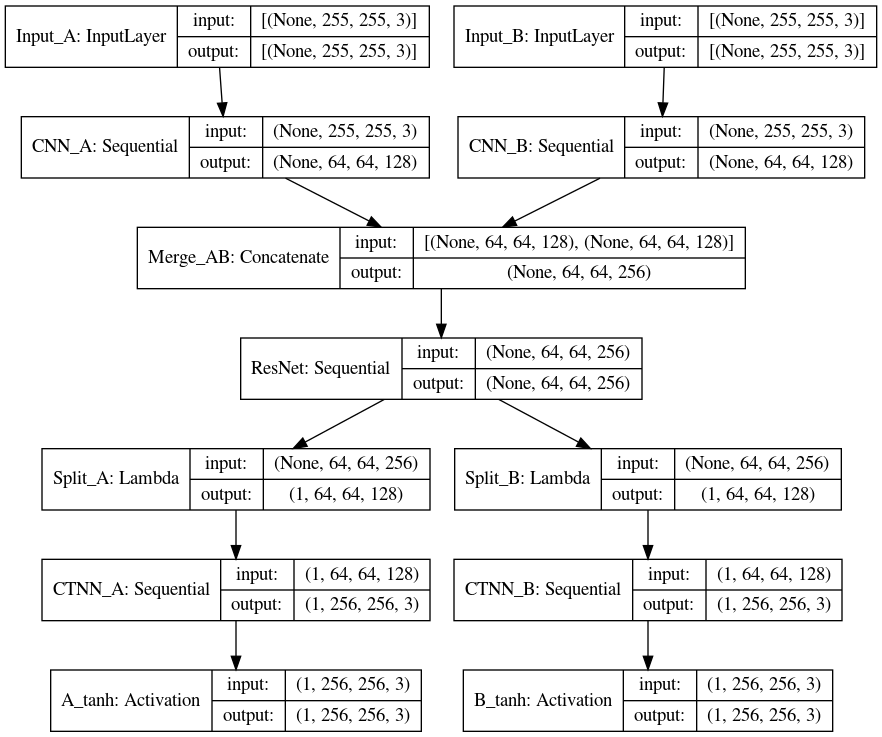

In [3]:
tf.keras.utils.plot_model(generator, to_file='generator_model.png', show_shapes=True)

## Generator summary

In [4]:
generator.summary()

Model: "Generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_A (InputLayer)            [(None, 255, 255, 3) 0                                            
__________________________________________________________________________________________________
Input_B (InputLayer)            [(None, 255, 255, 3) 0                                            
__________________________________________________________________________________________________
CNN_A (Sequential)              (None, 64, 64, 128)  97984       Input_A[0][0]                    
__________________________________________________________________________________________________
CNN_B (Sequential)              (None, 64, 64, 128)  97984       Input_B[0][0]                    
__________________________________________________________________________________________